In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading file
df = pd.read_csv('data.csv')

In [3]:
# 1st five records
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


In [4]:
# shape of dataset
df.shape

(398, 9)

In [5]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# statistical information
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [7]:
# nan values
df.isnull().any().sum()

0

No null values present in dataset

<AxesSubplot:xlabel='origin', ylabel='count'>

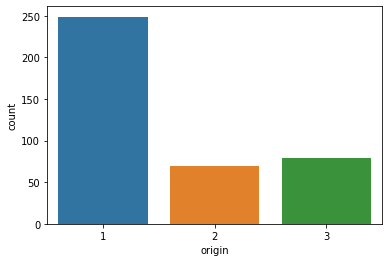

In [8]:
# origin
sns.countplot(df['origin'])

Almost 250 vehicles out of 400 are of origin 1 

and remaining 150 are distributed by origin 2 and origin 3

<AxesSubplot:xlabel='cylinders', ylabel='count'>

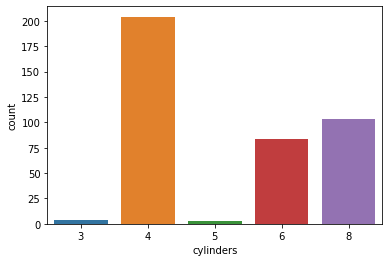

In [9]:
# cylinders
sns.countplot(df['cylinders'])

The most commmon cylinders vehicles have is 4 and after that is it 8 
THe least common cylinders are 3 and 5

In [10]:
# horsepower
df['horsepower'].nunique()

94

<AxesSubplot:xlabel='displacement', ylabel='Density'>

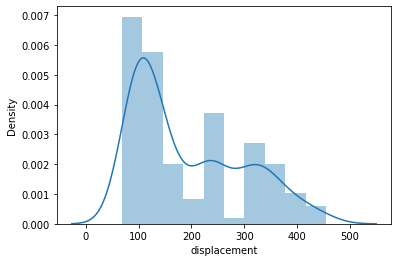

In [11]:
# displacement
sns.distplot(df['displacement'])

The displacement range is between 100 to 500
The graph is right skewed which means values are scattered at the right side of the graph

In [12]:
# ideally horsepower must be of  numerical type but we have it is in object type
# so we need to clean it so that we have it in numerical type

df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [13]:
def clean(x):
    if x =='?':
        return np.nan
    else:
        return x
df['horsepower'] = df['horsepower'].apply(clean)

In [14]:
df['horsepower'].isnull().sum()

6

In [15]:
df['horsepower'].mode()

0    150
Name: horsepower, dtype: object

In [16]:
# here we will fill all the nan values with mode
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mode()[0])
df['horsepower'] = df['horsepower'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


<AxesSubplot:xlabel='horsepower', ylabel='Density'>

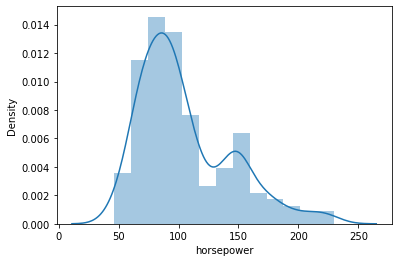

In [18]:
sns.distplot(df['horsepower'])

Just like displacement horsepower also gives right skewed graph
most of the horsepower is between 50 to 100.

<AxesSubplot:xlabel='weight', ylabel='Density'>

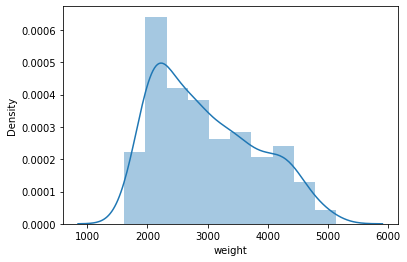

In [19]:
# weight
sns.distplot(df['weight'])

Right skewed .
most frequent range is 200 to 4000

<AxesSubplot:xlabel='acceleration', ylabel='Density'>

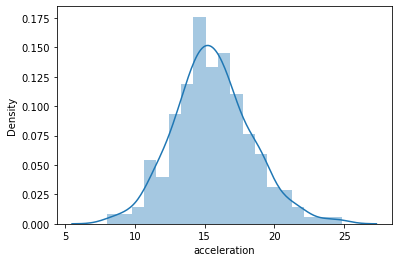

In [20]:
# acceleration
sns.distplot(df['acceleration'])

Normal distribution
most of the values are concentrated around the mean

In [21]:
# year
df['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='count'>

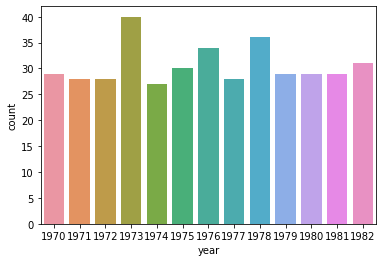

In [22]:
sns.countplot(df['year'])

almost uniform distribution except year 1973 has max count

In [23]:
df['name'].nunique()

305

In [24]:
# we will drop name columns
df.drop('name',inplace=True, axis=1)

<AxesSubplot:xlabel='Kilometer_per_liter', ylabel='Density'>

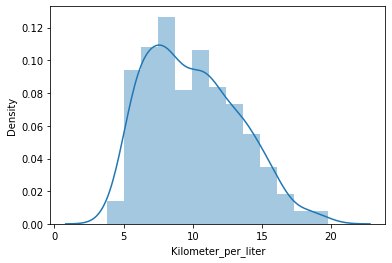

In [25]:
# Kilometer_per_liter
sns.distplot(df['Kilometer_per_liter'])

kind of normal distribution 
with most frequent range 5 to 15

In [26]:
df.head(2)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156


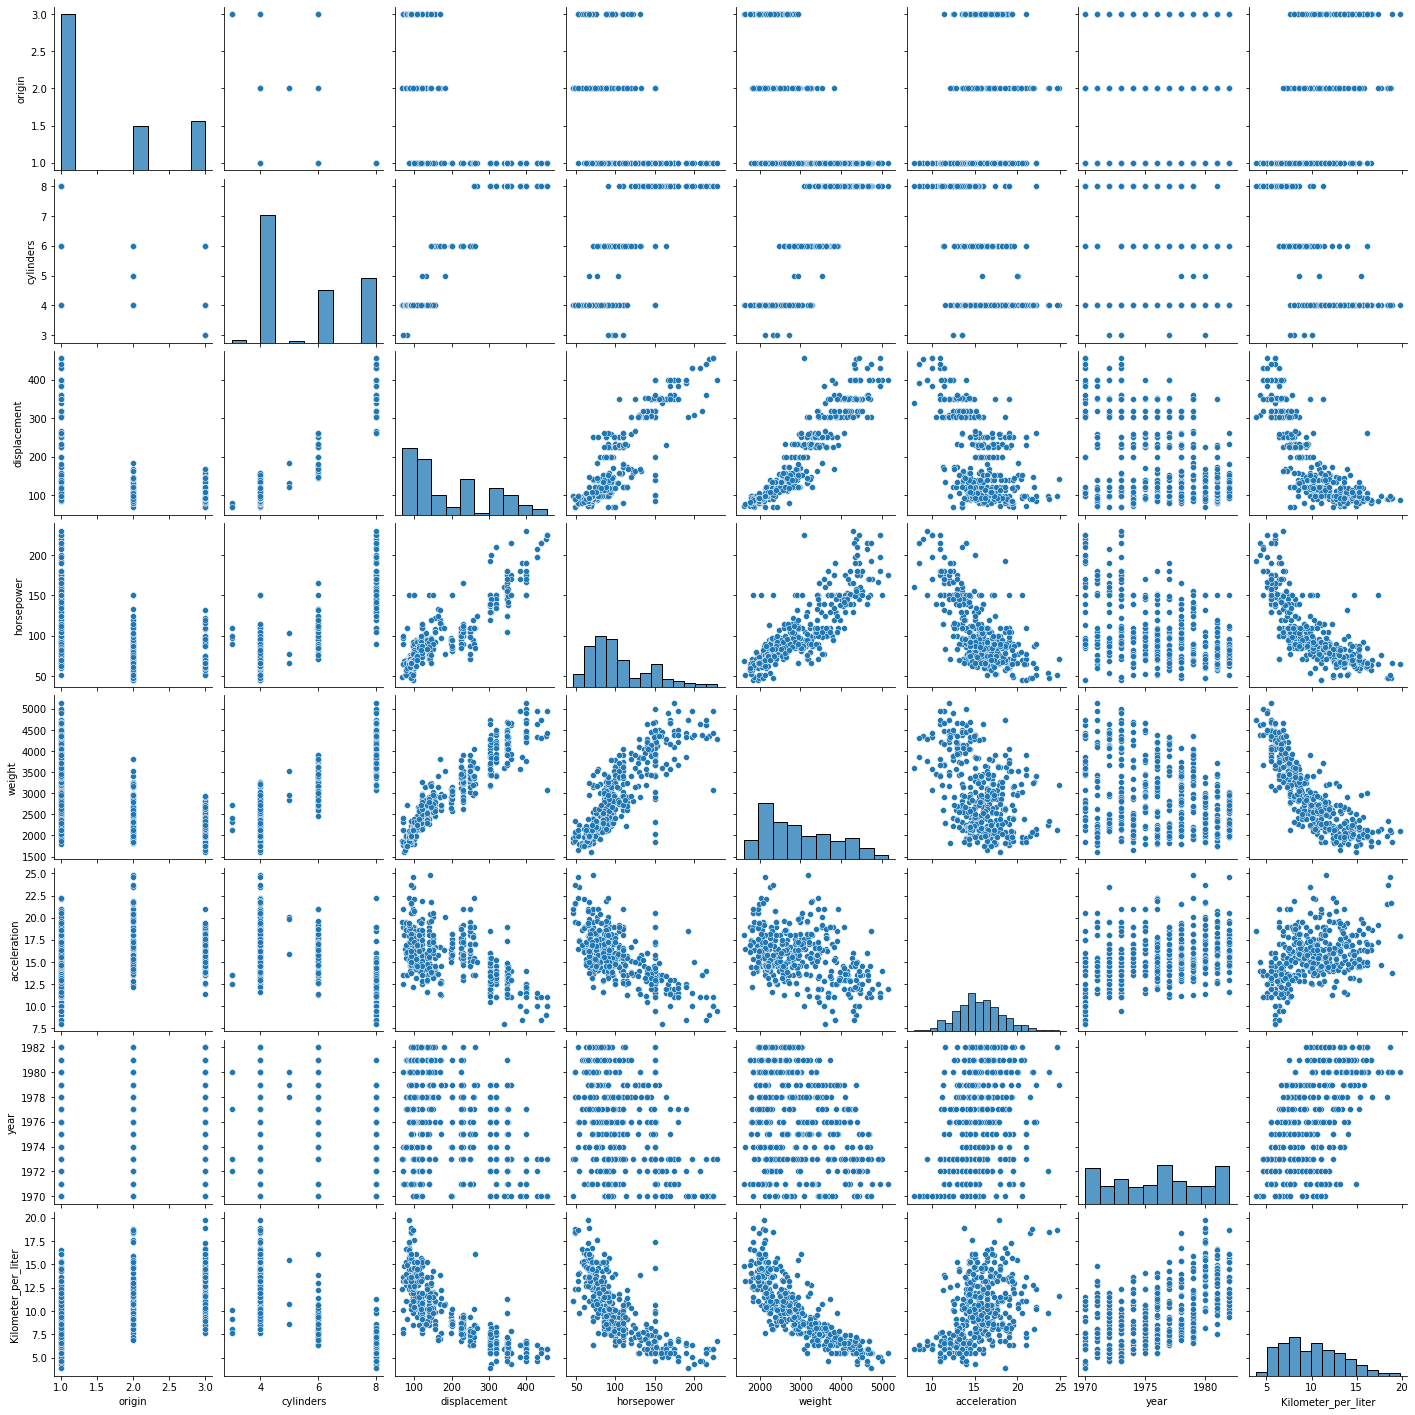

In [27]:
sns.pairplot(df)

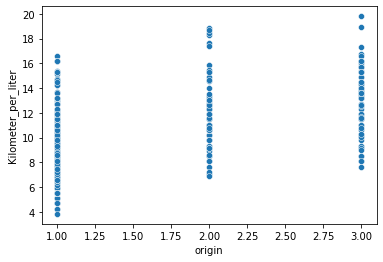

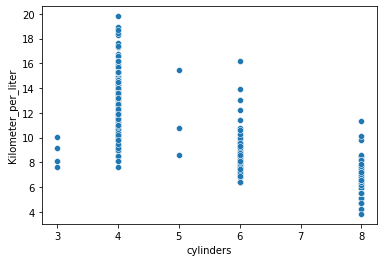

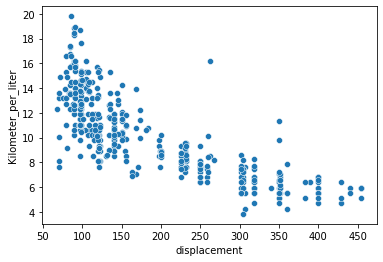

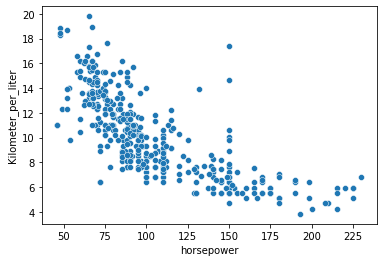

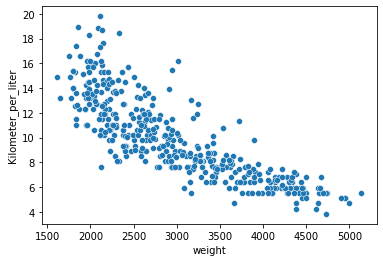

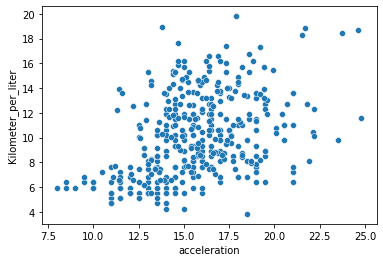

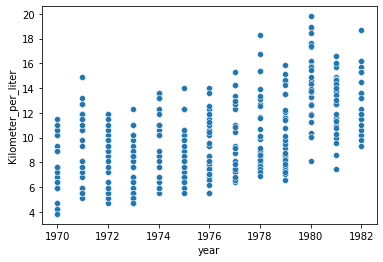

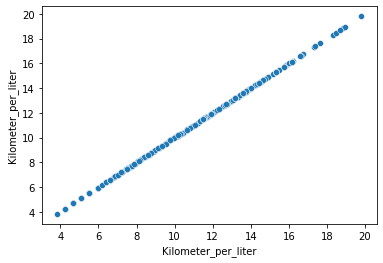

In [28]:
for feature in df.columns:
    sns.scatterplot(df[feature], df['Kilometer_per_liter'])
    plt.show()

<AxesSubplot:>

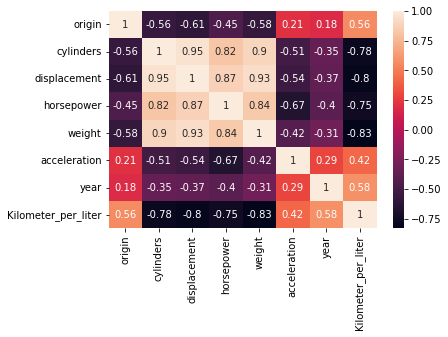

In [29]:
sns.heatmap(df.corr(),annot=True)

In [30]:
X = df.drop('Kilometer_per_liter',axis=1)
y = df['Kilometer_per_liter']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(318, 7)
(80, 7)
(318,)
(80,)


#### scaling

In [34]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [35]:
minmax = MinMaxScaler()
X_train_minmax = minmax.fit_transform(X_train)
X_test_minmax  = minmax.transform(X_test)

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler  = scaler.transform(X_test)

#### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train_minmax,y_train)

LinearRegression()

In [56]:
def model(model,X_train, X_test):
    # make prediction using the testing set
    y_test_pred = model.predict(X_test)
    
    # make prediction using training set
    y_train_pred = model.predict(X_train)
    
    # evalution metrics for regressor
    def metric(y_actual,y_pred):
        r2=r2_score(y_actual,y_pred)
        RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
        print("R2 Score: {} | RMSE: {}".format(round(r2,2),round(RMSE,2)))
        
    
    print("Training Performance")
    metric(y_train,y_train_pred)
    print("Testing Performance")
    metric(y_test,y_test_pred)
    
#     plt.scatter(y_test,y_test_pred)
#     plt.show()
    

In [57]:
# using minmax scaler
model(lr,X_train_minmax, X_test_minmax)

Training Performance
R2 Score: 0.83 | RMSE: 1.39
Testing Performance
R2 Score: 0.79 | RMSE: 1.5


In [59]:
# using standard scaler
model(lr,X_train_scaler, X_test_scaler)

Training Performance
R2 Score: -5.44 | RMSE: 8.46
Testing Performance
R2 Score: -4.7 | RMSE: 7.75


#### Polynomial regression

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

In [45]:
# transforming features to higher degree
X_train_poly = poly_features.fit_transform(X_train_minmax)
X_test_poly  = poly_features.fit_transform(X_test_minmax)

In [46]:
poly_model = LinearRegression()

In [47]:
#fitting the LR model to Plotnomial features
poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [48]:
#Prediction on Training data
y_pred_train=poly_model.predict(X_train_poly)

#Prediction on Testing data
y_pred_test=poly_model.predict(X_test_poly)

In [49]:
# Model Evaluation on Training & testing Data
def metric(y_actual,y_pred):
    r2=r2_score(y_actual,y_pred)
    RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
    print("R2 Score: {} | RMSE: {}".format(round(r2,2),round(RMSE,2)))

In [50]:
print("Training Performance")
metric(y_train,y_pred_train)
print("Testing Performance")
metric(y_test,y_pred_test)

Training Performance
R2 Score: 0.91 | RMSE: 1.02
Testing Performance
R2 Score: 0.82 | RMSE: 1.38


In [61]:
model(poly_model,X_train_poly, X_test_poly)

Training Performance
R2 Score: 0.91 | RMSE: 1.02
Testing Performance
R2 Score: 0.82 | RMSE: 1.38


#### Ridge  regression

In [51]:
from sklearn.linear_model import Ridge,Lasso

In [52]:
reg=Ridge(alpha=5,max_iter=10,random_state=123,tol=1)

In [53]:
reg.fit(X_train_minmax,y_train)

Ridge(alpha=5, max_iter=10, random_state=123, tol=1)

In [62]:
model(reg, X_train_minmax,X_test_minmax)

Training Performance
R2 Score: 0.8 | RMSE: 1.49
Testing Performance
R2 Score: 0.75 | RMSE: 1.64


#### Lasso Regression

In [63]:
las=Lasso(alpha=5,max_iter=10,random_state=123,tol=1)

In [64]:
las.fit(X_train_minmax,y_train)

Lasso(alpha=5, max_iter=10, random_state=123, tol=1)

In [66]:
model(las, X_train_minmax,X_test_minmax)

Training Performance
R2 Score: 0.0 | RMSE: 3.34
Testing Performance
R2 Score: -0.0 | RMSE: 3.25


### random forest regressor

In [67]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [68]:
## Importing Random Forest Classifier from the sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [69]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [70]:
rf_random.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [71]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  



In [72]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 40, bootstrap=False) 
randmf.fit( X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=40, max_features='sqrt',
                      min_samples_split=6, n_estimators=50)

In [74]:
model(randmf, X_train, X_test)

Training Performance
R2 Score: 0.99 | RMSE: 0.39
Testing Performance
R2 Score: 0.8 | RMSE: 1.46


In [75]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_prob": randmf.predict( 
( X_test ) ) } ) 
y_pred_rf1

,actual,predicted_prob
150,11.053736,10.491512
42,5.101724,5.328184
120,8.077730,8.495165
102,11.053736,12.251508
293,13.562084,14.956414
...,...,...
217,12.754311,12.281736
201,7.865159,7.663499
366,7.482529,8.647182
134,6.802299,6.985267


#### xgboost regressor

In [81]:
import xgboost as xg

In [82]:
train_dmatrix = xg.DMatrix(data = X_train, label =y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(mean_squared_error(y_test, pred))
print("RMSE : % f" %(rmse))

[20:09:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  6.186803
